In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs

from tqdm import tqdm

# Normalised Function

Simulation of 100.0s.


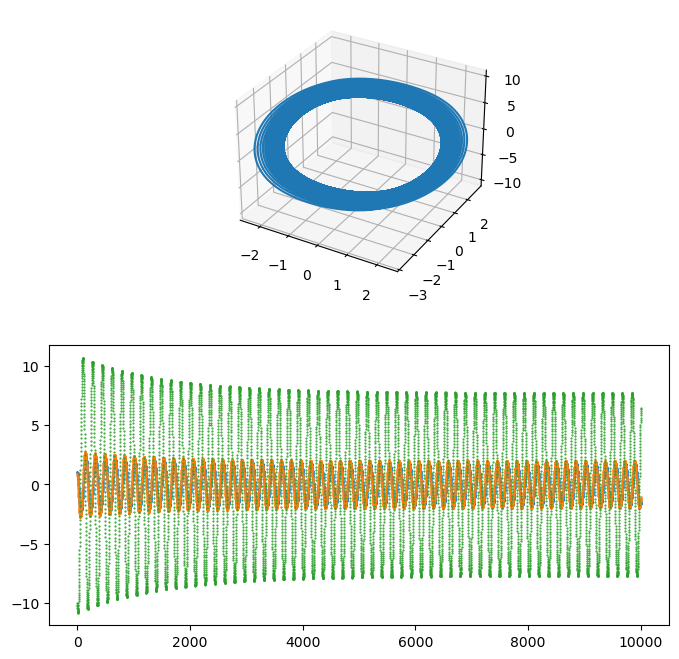

In [116]:
alpha,beta = 9,14.2886

def NIC(x):
    a,b = -1/7,2/7
    if x <= -1:
        f = b*x+b-a
    elif abs(x) < 1:
        f = a*x
    else:
        f = b*x-b+a
    return f

F,freq = 1,20

dt = 1e-2; duration = 1e4
print(f"Simulation of {dt*duration}s.")

X,Y,Z = [1],[1],[-10]
for i in range(int(duration)):
    t = i*dt

    xi,yi,zi = X[-1],Y[-1],Z[-1]

    dx = alpha*(yi-xi-NIC(xi))
    dy = xi-yi+zi
    # dz = -beta*(yi+F*np.sin(2*np.pi*freq*t))
    dz = -beta*yi
    
    X.append(xi+dx*dt);Y.append(yi+dy*dt);Z.append(zi+dz*dt)

duration = int(duration+1)
t = range(duration)

fig = plt.figure(figsize=(8,8))
grid = gs.GridSpec(2,1,wspace=0.1,)

time_s = plt.subplot(grid[1])
time_s.scatter(t,X,s=0.3); time_s.scatter(t,Y,s=0.3); time_s.scatter(t,Z,s=0.3)

plot3D = fig.add_subplot(grid[0],projection='3d')
plot3D.plot(X,Y,Z
            #    ,s=0.03
               )

plt.show()

# Actual Values

Simulation of 0.09999999999999999s.


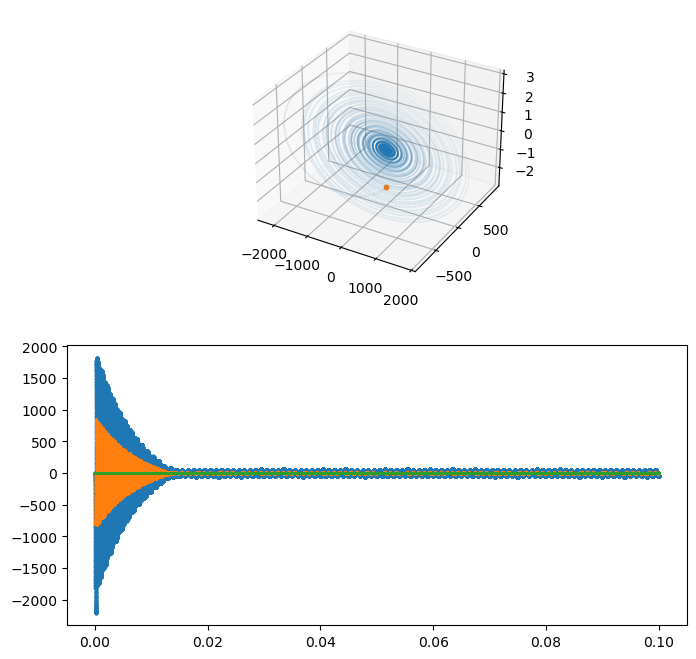

In [13]:
R = 2000
C1 = 10e-9
C2 = 100e-9
L = 15e-3

R4,R6 = 22000,3300
R2,R3 = 220,2200

E = 9

m0 = 1/R4-1/R3
m1 = -1/R3-1/R6
Bp = R3/(R2+R3)*E

def NIC(x):
    g = m0*x+1/2*(m1-m0)*(abs(x+Bp)-abs(x-Bp))
    return g

F,freq = 5,1000

dt = 1e-6; duration = 1e5
print(f"Simulation of {dt*duration}s.")

X,Y,Z = [1],[-4],[-2]
for i in range(int(duration)):
    t = i*dt

    xi,yi,zi = X[-1],Y[-1],Z[-1]

    dx = (yi-xi-NIC(xi))/R-NIC(xi)
    dy = (xi-yi)/R+zi
    dz = -yi+F*np.sin(2*np.pi*freq*t)
    # dz = -yi
    X.append(xi+dx/C1*dt);Y.append(yi+dy/C2*dt);Z.append(zi+dz/L*dt)

t = [t*dt for t in range(int(duration+1))]

fig = plt.figure(figsize=(8,8))
grid = gs.GridSpec(2,1,wspace=0.1,)

time_s = plt.subplot(grid[1])

idx = 0000

X,Y,Z,t = X[idx:],Y[idx:],Z[idx:],t[idx:]

time_s.scatter(t,X,s=3); time_s.scatter(t,Y,s=0.3); time_s.scatter(t,Z,s=0.3)

plot3D = fig.add_subplot(grid[0],projection='3d')
plot3D.scatter(X,Y,Z
               ,s=0.003
               )
plot3D.scatter(X[0],Y[0],Z[0]
               ,s=10
               )

plt.show()

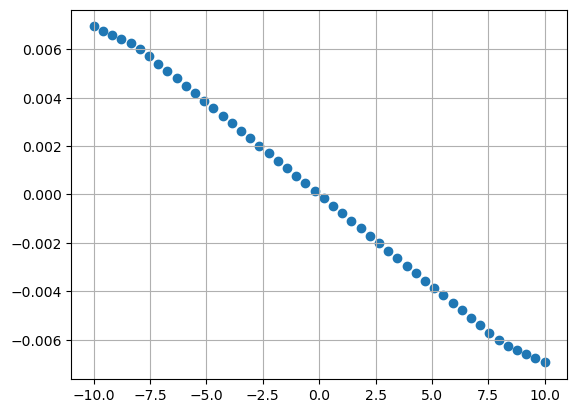

In [5]:
# Check NIC

X = np.linspace(-10,10)
Y = [NIC(x) for x in X]
plt.scatter(X,Y)
plt.grid()